# GELİŞMİŞ FONKSİYONEL KEŞİFÇİ VERİ ANALİZİ

1. Genel Resim

2. Kategorik Değişken Analizi (Analysis of Categorical Variables)

3. Sayısal Değişken Analizi (Analysis of Numerical Variables)

4. Hedef Değişken Analizi (Analysis of Target Variable)

5. Korelasyon Analizi (Analysis of Correlation)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. GENEL RESİM

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
df.shape

(891, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
df.isnull().values.any()

True

In [11]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(891, 15)
##################### Types #####################
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
##################### Head #####################
   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  

In [13]:
df = sns.load_dataset("flights")
check_df(df)

##################### Shape #####################
(144, 3)
##################### Types #####################
year             int64
month         category
passengers       int64
dtype: object
##################### Head #####################
   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
##################### Tail #####################
     year month  passengers
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432
##################### NA #####################
year          0
month         0
passengers    0
dtype: int64
##################### Quantiles #####################
            count         mean         std     min      0%      5%     50%      95%      99%    100%     max
year        144.0  1954.500000    3.464102  1949.0  1949.0  1949.0  1954.5  1960.00  1960.00  1960.0  1960.0
passen

# KATEGORİK DEĞİŞKENLERİN ANALİZİ
cat_summary

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [17]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [18]:
df["class"].nunique()

3

sinsirella:

bazı numeric (int) olup kategorik değişkenleri ayırt etmemiz gerekiyor.

ilgili değişkenin tip biligisini stringe çevirip

tipi bool object bool olanları listele

In [19]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]


eşsiz sınıf sayısı 10 dan az olanları numeric görünümlü kategorik değişken olarak düşünüyoruz.

In [20]:
# eşsiz sınıf sayısı 10 dan az olanları numeric görünümlü kategorik değişken olarak düşünüyoruz.
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]

burda da numerik olmasada fazla unique değeri olan kategorik değişkenleri görüyoruz.

mesela 850 farklı isim olabilir. yani kategorik bir anlam taşımaz

kardinalitesi yüksek, yani hesaplama değeri taşımayan


20 den fazla farklı değeri olan değişkenleri belirliyoruz.

In [21]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

In [22]:
cat_cols = cat_cols + num_but_cat

In [23]:
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [24]:
df[cat_cols].nunique()

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
survived       2
pclass         3
sibsp          7
parch          7
dtype: int64

sayısal değişkenlleri görmek için

In [25]:
[col for col in df.columns if col not in cat_cols]

['age', 'fare']

her satırdan kaç tane var.

In [26]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

% kaç tane var olduğunu anlamak için

In [27]:
100 * df["survived"].value_counts() / len(df)

0    61.616162
1    38.383838
Name: survived, dtype: float64

In [28]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

In [29]:
cat_summary(df, "sex")

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


In [30]:
for col in cat_cols:
    cat_summary(df, col)

# dataframe türünde sözlük yapısında bir fonksiyon tanımlama
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
##########################################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#####################

In [40]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


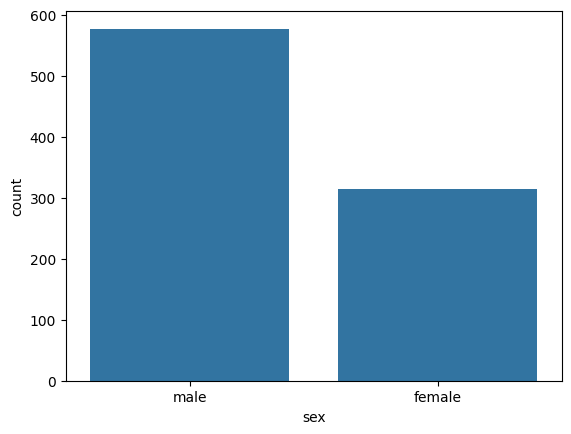

In [42]:
cat_summary(df, "sex", plot=True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


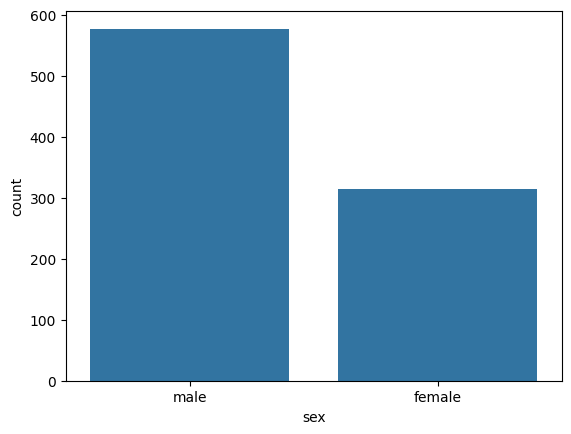

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################


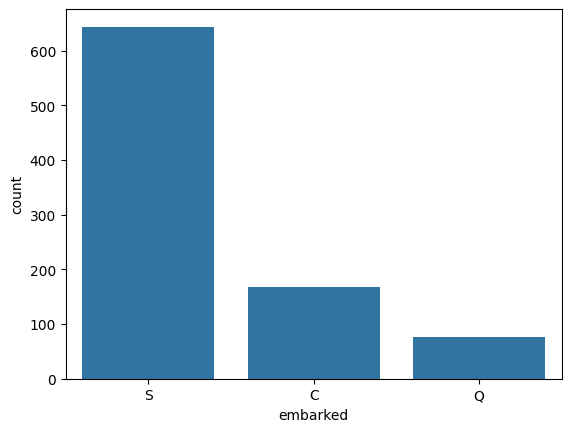

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################


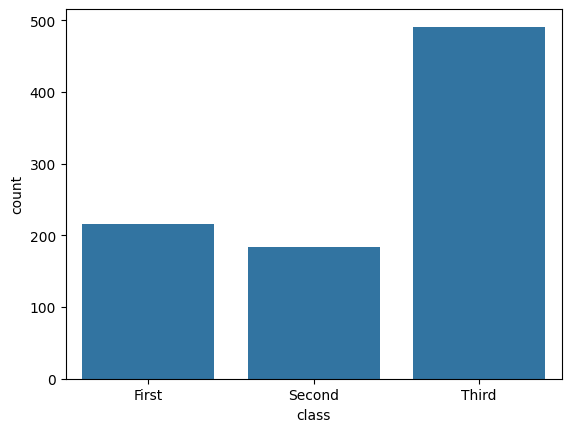

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################


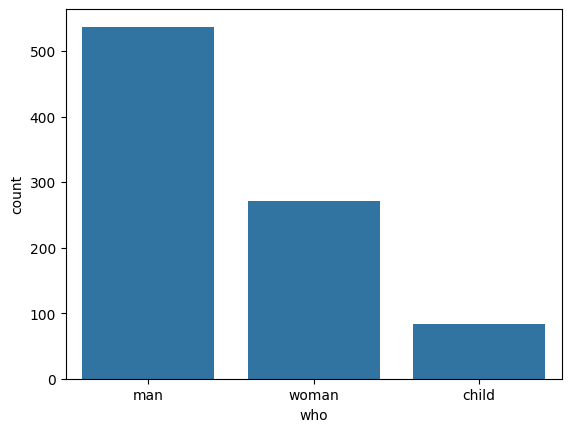

       adult_male     Ratio
True          537  60.26936
False         354  39.73064
##########################################


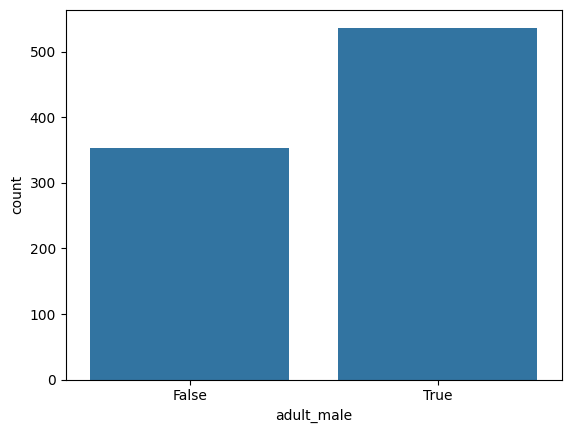

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################


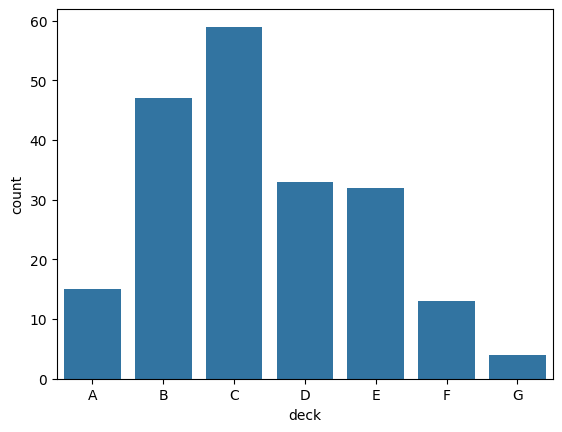

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##########################################


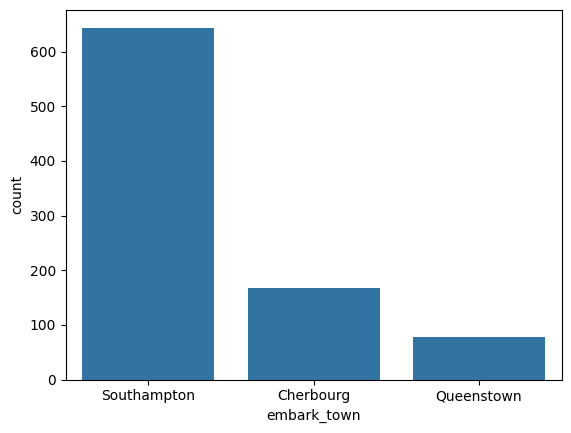

     alive      Ratio
no     549  61.616162
yes    342  38.383838
##########################################


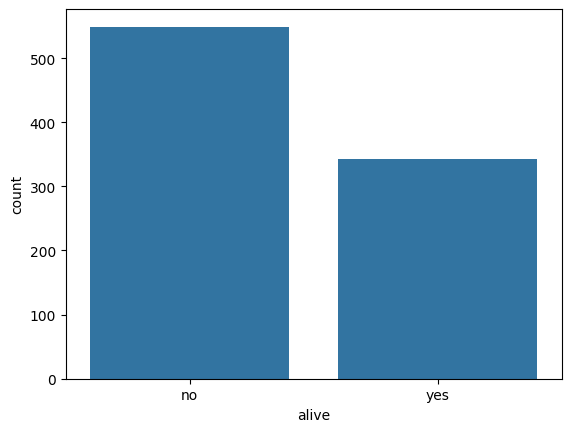

       alone     Ratio
True     537  60.26936
False    354  39.73064
##########################################


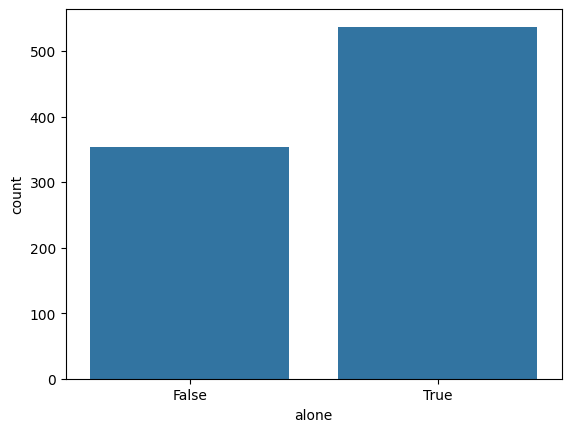

   survived      Ratio
0       549  61.616162
1       342  38.383838
##########################################


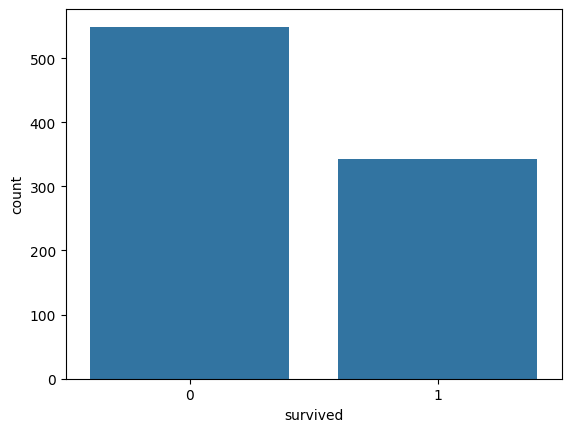

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
##########################################


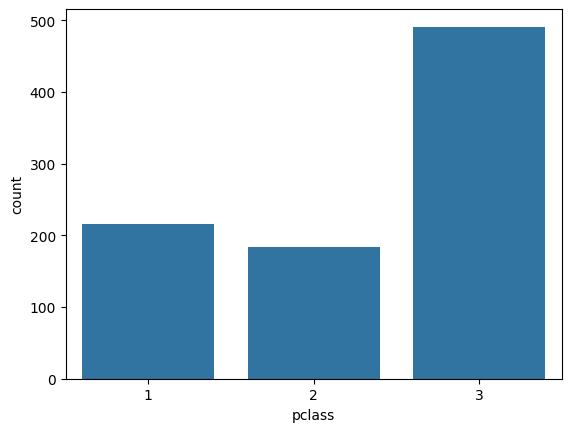

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##########################################


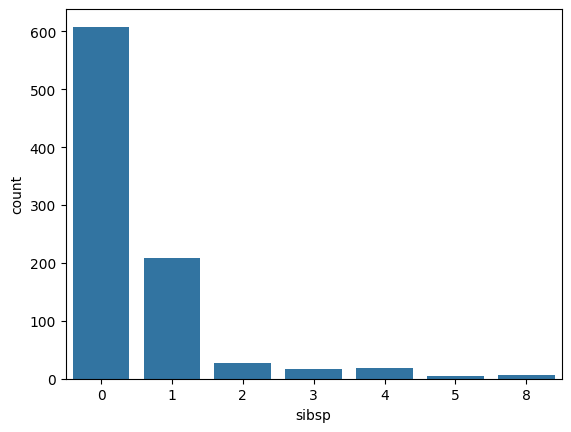

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
##########################################


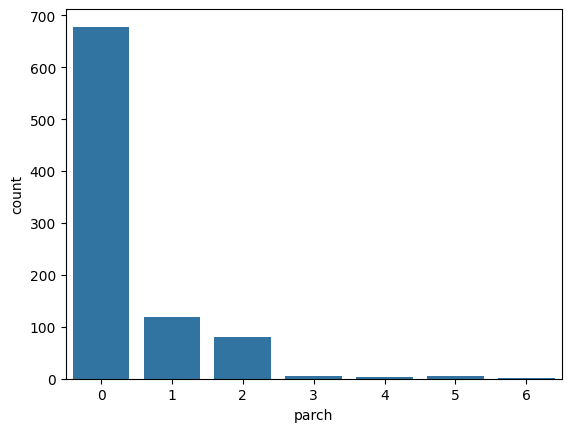

In [46]:
for col in cat_cols:
  cat_summary(df, col, plot = True)

In [47]:
df["adult_male"].astype(int)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: adult_male, Length: 891, dtype: int64

# SAYISAL DEĞİŞKENLERİN ANALİZİ

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
pd.set_option("display.max_columns",None)
pd.set_option("display.width", 500)
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [58]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [59]:
df[["age", "fare"]].describe().T

,count,mean,std,min,25%,50%,75%,max
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [62]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
num_cols

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

bazıları sayısal görünümde olsa da aslında sayısal değiller.


In [64]:
num_cols = [col for col in num_cols if col not in cat_cols]
num_cols

['age', 'fare']

In [65]:
def num_summary(dataframe, numerical_col):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T)

In [66]:
num_summary(df, "age")

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


In [67]:
for col in num_cols:
    num_summary(df, col)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


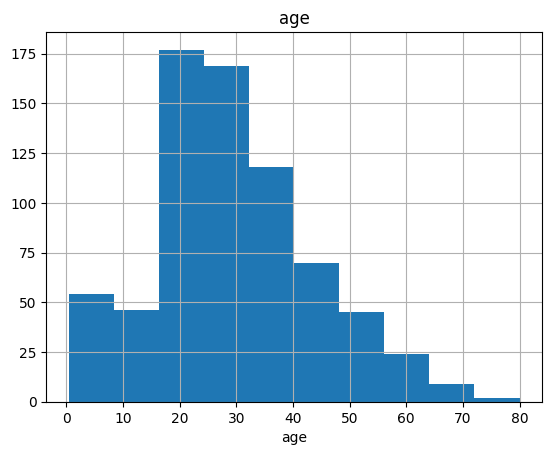

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


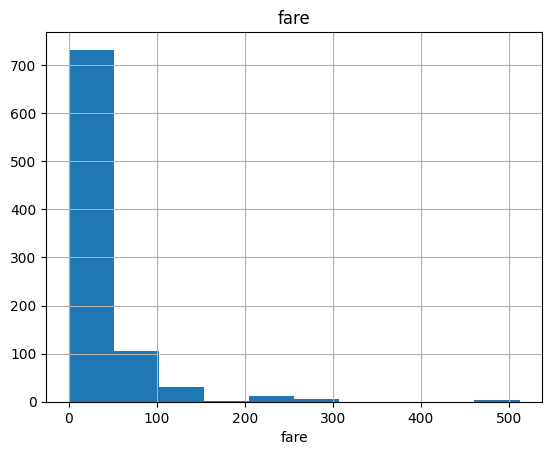

In [69]:
# plot özelliği ekle
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)


# num_summary(df, "age", plot=True)

for col in num_cols:
    num_summary(df, col, plot=True)

# DEĞİŞKENLERİN YAKALANMASI
capturing variables and generalized operations

otomatik yakalnamas ve genelleştirilmesi

bir fonksiyon tanımlayacağız. daha sonrasında bu fonksiyonun diğer kullanıcılar tarafından kullanılırken hangi bilgileri barındırması gerektiği konusuna değinicez.


öyle bir fonksiyon tanımlamalıyım ki bana

kategorik değişken listesini

numeric değişken listesini

kategorik ama kardinal değişken listesini versin.

numeri görünümlü kardinallerle ilgilenmiyorum çünü cat içine atmıştık.

In [72]:
# cat_th : değişken sayısal olsa dahi eşsiz sınıf sayısı 10 dan az ise bunu kategorik olarak alıyoruz.
# car_th : değişken kategorik olsa da eşsiz sınıf sayısı 30 dan çok ise bunu kardinal  değişken muamelesi yapacağız.
# docstring

def grab_col_names(dataframe, cat_th=10,  car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

kategorik değişkenler ['sex',
  'embarked',
  'class',
  'who',
  'adult_male',
  'deck',
  'embark_town',
  'alive',
  'alone',
  'survived',
  'pclass',
  'sibsp',
  'parch']

numeric değişkenler ['age', 'fare']

kardinal değişken yok

In [77]:
grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 13
num_cols: 2
cat_but_car: 0
num_but_cat: 4


(['sex',
  'embarked',
  'class',
  'who',
  'adult_male',
  'deck',
  'embark_town',
  'alive',
  'alone',
  'survived',
  'pclass',
  'sibsp',
  'parch'],
 ['age', 'fare'],
 [])

In [78]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 13
num_cols: 2
cat_but_car: 0
num_but_cat: 4


In [79]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

cat_summary(df, "sex")

for col in cat_cols:
    cat_summary(df, col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################
        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
##########################################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################
             embark_town      Ratio
Southampton      

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


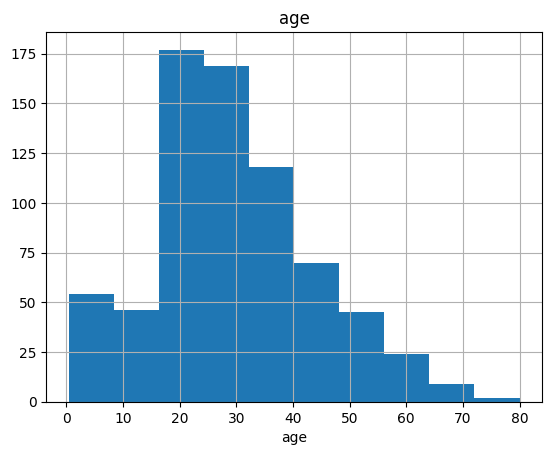

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


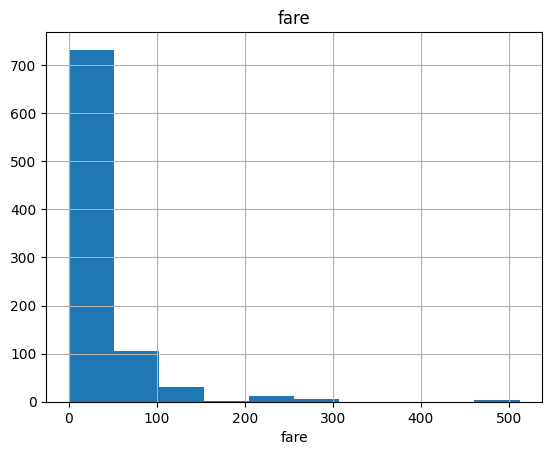

In [81]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)


for col in num_cols:
    num_summary(df, col, plot=True)

# BONUS

Veri seti içerisinde yer alan bool tipindeki değişkenleri bulup bunları int e çevirmek

ve daha sonra da cat_summary fonknu görsel özellikli olarak daha kolay bir şekilde kullanmak